# Universidad de Buenos Aires
# Deep Learning - Examen
# Agosto 2023


El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 27 de Agosto a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen AGOSTO 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dada la siguiente función:

$$
f(x,y) = (1.5 - x + xy)^2 + (2.25-x+xy^2)^2 + (2.625 -x + xy^3)^2
$$


Encontrar el punto donde la función es mínima y el valor de dicho mínimo:

a. Utilizando SGD y cálculo de gradiente con regla de la cadena.



In [1]:
import numpy as np

def f(x, y):
    z = ((1.5-x+x*y)**2)+((2.25-x+x*y**2)**2)+((2.625-x+x*y**3)**2)
    return z

def grad(x, y):
    
    # Calculo la derivada de L respecto x termino a termino y utilizando la regla de la cadena.
    lx = 2*(1.5-x+x*y)*(y-1)
    lx = lx + 2*(2.25-x+x*y**2)*(y**2-1)
    lx = lx + 2*(2.625-x+x*y**3)*(y**3-1)

    # Calculo la derivada de L respecto y termino a termino y utilizando la regla de la cadena.
    ly = 2*(1.5-x+x*y)*x
    ly = ly + 2*(2.25-x+x*y**2)*(2*x*y)
    ly = ly + 2*(2.625-x+x*y**3)*(3*x*y**2)

    return lx,ly

n_epochs = 5000

# inicializo en un punto aleatorio
x = np.random.rand()
y = np.random.rand()

alfa = 0.01
for e in range(n_epochs):
    # calculo el gradiente
    gx, gy = grad(x,y)
    # actualizo los valores
    x = x - gx*alfa
    y = y - gy*alfa
    print("epoch = {e} - f(x,y) = {z}".format(e=e, z=f(x,y)))

print("x = {x1} - y = {y1}".format(x1=x, y1=y))

epoch = 0 - f(x,y) = 9.535809794196666
epoch = 1 - f(x,y) = 7.714151018617623
epoch = 2 - f(x,y) = 6.4668425511018865
epoch = 3 - f(x,y) = 5.5048550560709195
epoch = 4 - f(x,y) = 4.728845148661567
epoch = 5 - f(x,y) = 4.090539228664181
epoch = 6 - f(x,y) = 3.5605064143258525
epoch = 7 - f(x,y) = 3.1180620034826108
epoch = 8 - f(x,y) = 2.7474406163294987
epoch = 9 - f(x,y) = 2.4360916512354542
epoch = 10 - f(x,y) = 2.173794424976415
epoch = 11 - f(x,y) = 1.9521297294684183
epoch = 12 - f(x,y) = 1.7641255601699344
epoch = 13 - f(x,y) = 1.603998239959822
epoch = 14 - f(x,y) = 1.4669515831019648
epoch = 15 - f(x,y) = 1.3490147528484187
epoch = 16 - f(x,y) = 1.2469079714058542
epoch = 17 - f(x,y) = 1.1579295754683625
epoch = 18 - f(x,y) = 1.079860256073271
epoch = 19 - f(x,y) = 1.0108816410912425
epoch = 20 - f(x,y) = 0.9495071368126858
epoch = 21 - f(x,y) = 0.8945233873021791
epoch = 22 - f(x,y) = 0.8449409757075197
epoch = 23 - f(x,y) = 0.7999531622965046
epoch = 24 - f(x,y) = 0.758901577

b. Utilizando SGD y pytorch.

In [2]:
import torch

n_epochs = 5000

# inicializo los tensores en un punto aleatorio

x = torch.tensor([np.random.rand()], requires_grad=True)
y = torch.tensor([np.random.rand()], requires_grad=True)
z = (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2
alfa =0.01# torch.tensor([0.01], requires_grad=False)

for e in range(n_epochs):
    
    # calculo el gradiente
    z.backward()
    # actualizo los valores
    x = torch.tensor([x - x.grad * alfa], requires_grad=True)
    y = torch.tensor([y - y.grad * alfa], requires_grad=True)
    z = (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2
    print("epoch = {e} - f(x,y) = {z}".format(e=e, z=z))
    
print("x = {x1} - y = {y1}".format(x1=x, y1=y))

epoch = 0 - f(x,y) = tensor([8.9933], grad_fn=<AddBackward0>)
epoch = 1 - f(x,y) = tensor([7.8856], grad_fn=<AddBackward0>)
epoch = 2 - f(x,y) = tensor([6.9153], grad_fn=<AddBackward0>)
epoch = 3 - f(x,y) = tensor([6.0614], grad_fn=<AddBackward0>)
epoch = 4 - f(x,y) = tensor([5.3134], grad_fn=<AddBackward0>)
epoch = 5 - f(x,y) = tensor([4.6624], grad_fn=<AddBackward0>)
epoch = 6 - f(x,y) = tensor([4.0994], grad_fn=<AddBackward0>)
epoch = 7 - f(x,y) = tensor([3.6147], grad_fn=<AddBackward0>)
epoch = 8 - f(x,y) = tensor([3.1988], grad_fn=<AddBackward0>)
epoch = 9 - f(x,y) = tensor([2.8428], grad_fn=<AddBackward0>)
epoch = 10 - f(x,y) = tensor([2.5384], grad_fn=<AddBackward0>)
epoch = 11 - f(x,y) = tensor([2.2780], grad_fn=<AddBackward0>)
epoch = 12 - f(x,y) = tensor([2.0552], grad_fn=<AddBackward0>)
epoch = 13 - f(x,y) = tensor([1.8641], grad_fn=<AddBackward0>)
epoch = 14 - f(x,y) = tensor([1.6997], grad_fn=<AddBackward0>)
epoch = 15 - f(x,y) = tensor([1.5578], grad_fn=<AddBackward0>)
ep

Por lo que el punto mínimo esta en x = 3 / y = 0,5.

## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?


In [3]:
'''
Conv1:
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16
'''
conv1 = torch.nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 7, padding = 2, stride = 1)

'''
Conv2:
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32
'''
conv2 = torch.nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, padding = 0, stride = 1)

'''
Activación:
* Tanh()
'''
act = torch.nn.Tanh()

'''
Pooling
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5
'''
pool = torch.nn.MaxPool2d(kernel_size = 5, stride = 5, padding = 0, ceil_mode=False)

# imagen de ejemplo

img = torch.rand(1, 3, 1024, 720)

print(img.shape)

# forward
x  = conv1(img)
x = conv2(x)
x = act(x)
salida = pool(x)

print(salida.shape)

torch.Size([1, 3, 1024, 720])
torch.Size([1, 32, 203, 142])


Tamaño = 203x142 y con 32 canales.





b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?

In [4]:
# Agrego la Fully Connected

f = salida.shape
print(f)

fc = torch.nn.Linear(in_features = f[1]*f[2]*f[3], out_features = 3)

salida_fc = fc(salida.view(salida.shape[0], -1))    # vectorizada 

print(salida_fc.shape)
print(f[1]*f[2]*f[3])

torch.Size([1, 32, 203, 142])
torch.Size([1, 3])
922432


Por lo anterior, el tamaño de la FC deberá ser de 922.432.

## Ejercicio 3




Para la siguiente red neuronal recurrente, se pide expresar las ecuaciones "*unfolded*" de la salida de la misma y de sus estados ocultos, si el vector de entrada son 3 muestras secuenciadas de la variable $x(t)$.

![b](https://drive.google.com/uc?export=view&id=1Fz46GTK7Oy_w5OEgwLCLfHFMr7b6-AnL)




Ecuaciones de la RNN:x

$$ \hat{y}(t) = w_{h1y} * h1(t) + w_{h2y} * h2(t) + by$$

$$ h1(t) = w_{xh1} * x(t) + w_{h1h1} * h1(t-1) + w_{h2h1} * h2(t-1)+ bh1$$
$$ h2(t) = w_{xh2} * x(t) + w_{h2h2} * h2(t-1) + w_{h1h2} * h1(t-1)+ bh2 $$

## $ t = 0 $

$ h1(t=0) = w_{xh1} * x(t=0) + w_{h1h1} * 0 + w_{h2h1} * 0 + bh1 $

$ h1(t=0) = w_{xh1} * x(t=0) + bh1 $

$ h2(t=0) = w_{xh2} * x(t=0) + w_{h2h2} * 0 + w_{h1h2} * 0 + bh2 $

$ h2(t=0) = w_{xh2} * x(t=0) + bh2 $

$ \hat{y}(t=0) = w_{h1y} * h1(t=0) + w_{h2y} * h2(t=0) + by $

$ \hat{y}(t=0) = w_{h1y} * [w_{xh1} * x(t=0) + bh1] + w_{h2y} * [w_{xh2} * x(t=0) + bh2] + by$



## $ t = 1 $

$ h1(t=1) = w_{xh1} * x(t=1) + w_{h1h1} * h1(t=0) + w_{h2h1} * h2(t=0) + bh1 $

$ h1(t=1) = w_{xh1} * x(t=1) + w_{h1h1} * [w_{xh1} * x(t=0) + bh1] + w_{h2h1} * [w_{xh2} * x(t=0) + bh2] + bh1 $

$ h2(t=1) = w_{xh2} * x(t=1) + w_{h2h2} * h2(t=0) + w_{h1h2} * h1(t=0) + bh2 $

$ h2(t=1) = w_{xh2} * x(t=1) + w_{h2h2} * [w_{xh2} * x(t=0) + bh2] + w_{h1h2} * [w_{xh1} * x(t=0) + bh1] + bh2 $

...

$ \hat{y}(t=1) = w_{h1y} * h1(t=1) + w_{h2y} * h2(t=1) + by $

$ \hat{y}(t=1) = w_{h1y} * [w_{xh1} * x(t=1) + w_{h1h1} * [w_{xh1} * x(t=0) + bh1] + w_{h2h1} * [w_{xh2} * x(t=0) + bh2] + bh1] + w_{h2y} * [w_{xh2} * x(t=1) + w_{h2h2} * [w_{xh2} * x(t=0) + bh2] + w_{h1h2} * [w_{xh1} * x(t=0) + bh1] + bh2] + by $

## $ t = 2 $

$ h1(t=2) = w_{xh1} * x(t=2) + w_{h1h1} * h1(t=1) + w_{h2h1} * h2(t=1) + bh1 $

$ h1(t=2) = w_{xh1} * x(t=2) + w_{h1h1} * [w_{xh1} * x(t=1) + w_{h1h1} * [w_{xh1} * x(t=0) + bh1] + w_{h2h1} * [w_{xh2} * x(t=0) + bh2] + bh1] + w_{h2h1} * [w_{xh2} * x(t=1) + w_{h2h2} * h2(t=0) + w_{h1h2} * h1(t=0) + bh2] + bh1 $

$ h2(t=2) = w_{xh2} * x(t=2) + w_{h2h2} * h2(t=1) + w_{h1h2} * h1(t=1) + bh2 $

$ h2(t=2) = w_{xh2} * x(t=2) + w_{h2h2} * [w_{xh2} * x(t=1) + w_{h2h2} * h2(t=0) + w_{h1h2} * h1(t=0) + bh2] + w_{h1h2} * [w_{xh1} * x(t=1) + w_{h1h1} * [w_{xh1} * x(t=0) + bh1] + w_{h2h1} * [w_{xh2} * x(t=0) + bh2] + bh1] + bh2 $

...

$ \hat{y}(t=2) = w_{h1y} * h1(t=2) + w_{h2y} * h2(t=2) + by $

$ \hat{y}(t=2) = w_{h1y} * [w_{xh1} * x(t=2) + w_{h1h1} * [w_{xh1} * x(t=1) + w_{h1h1} * [w_{xh1} * x(t=0) + bh1] + w_{h2h1} * [w_{xh2} * x(t=0) + bh2] + bh1] + w_{h2h1} * [w_{xh2} * x(t=1) + w_{h2h2} * h2(t=0) + w_{h1h2} * h1(t=0) + bh2] + bh1] + w_{h2y} * [w_{xh2} * x(t=2) + w_{h2h2} * [w_{xh2} * x(t=1) + w_{h2h2} * h2(t=0) + w_{h1h2} * h1(t=0) + bh2] + w_{h1h2} * [w_{xh1} * x(t=1) + w_{h1h1} * [w_{xh1} * x(t=0) + bh1] + w_{h2h1} * [w_{xh2} * x(t=0) + bh2] + bh1] + bh2] + by $

## Ejercicio 4



Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gastar mucha plata (más de 9000) o poca plata (menos de 9000).

- a)	Entrenar un modelo de deep learning que no utilice embeddings y que no emplee el `user_id` ni el `product_id`.
- b)	Entrenar un modelo de deep learning que utilice embeddings tanto para los productos como los usuarios. Realizar el mapeo de identificador de producto y usuarios a indices antes de separar el dataset en training, validation y testing.
- c)	Grafique las curvas de la loss function en función de las epochs de cada modelo y comente lo necesario.
- d) Compare el score de cada modelo.



### TRABAJO CON EL DATASET (RESUMEN)
No se muestran las visualizaciones de trablas o gráficos, unicamente las modificaciones a los datos.

In [5]:
# Importación de bibliotecas
import pandas as pd
import numpy as np

# Carga del dataset
df = pd.read_csv('dataset_black_sales.csv')

De un primer análisis, hay 31,5% de valores faltantes en Product_Category_2 y 69,7% de valores faltantes en Product_Category_3.

In [6]:
# Gender. Se realiza One Hot Encoder sobre esta columna.

df['Gender'].unique()

df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='gender')], axis = 1)

# Age. Se utiliza la función Lambda para asignar números a los distintos rangos de edad.

df['Age'].unique()

df['Age'] = df['Age'].apply(lambda a:0 if a=='0-17' else 1 if a=='18-25' else 2 if a=='26-35' else 3 if a=='36-45' else 4 if a=='46-50' else 5 if a=='51-55' else 6)

# City Category. One Hot Encoding.

df['City_Category'].unique()

df = pd.concat([df, pd.get_dummies(df['City_Category'], prefix='city_category')], axis = 1)

# Stay in current city (Years). One Hot Encoding.

df['Stay_In_Current_City_Years'].unique()

df = pd.concat([df, pd.get_dummies(df['Stay_In_Current_City_Years'], prefix='stay_in_current_city')], axis = 1)

# Se eliminan las columnas con las cuales se realizó OHE.

df = df.drop(['Gender', 'City_Category', 'Stay_In_Current_City_Years'], axis = 1)


Con lo anterior, las columnas que me interesan ya son de tipo numérico. Ahora voy a tratar las columnas categoría de producto en especial sus datos faltantes.

Se consideró que las categorias 2 y 3 son subcategorias. Dado lo anterior, se estableció que los productos que tienen valores faltantes en dichas columnas son productos que no pertenencen alguna de las subcategorias 2/3 por lo que no se los considera datos faltantes y se reemplazan los valores NaN por 0.

<AxesSubplot:>

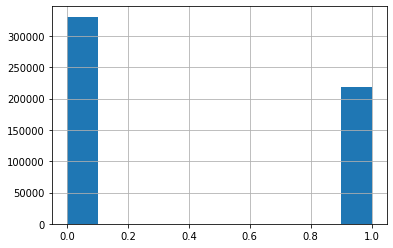

In [7]:
# se reemplazan los NaNs por cero.
df = df.fillna(0)

# Convierto la columna purchase en binaria según lo pedido.
df["Purchase_label"] = df["Purchase"].apply(lambda p:0 if p<=9000 else 1)       # 0 poca plata, 1 mucha plata

# Analizo el desbalance del dataset.
df["Purchase_label"].hist()

Pese al desbalance decidí continuar con este dataset, al menos en forma inicial, sin realizar un balanceo de datos.

In [8]:
# se eliminan las columnas que no se utilizarán en la siguiente etapa

user_id = df.User_ID            # Copio user_id para usarla en la parte 2 del ejercicio.
product_id = df.Product_ID      # Copio producto_id para usarla en la parte 2 del ejercicio.

ds = df.drop(['User_ID', 'Product_ID','Purchase'], axis = 1)

### Normalización y división del dataset

In [9]:
# se crea la divisiónd de datos en features y variable a predecir
x0 = ds.drop(['Purchase_label'], axis = 1)
y0 = ds['Purchase_label']

# se convierte a Numpy para poder ser utilizadas por pyTorch
x = x0.to_numpy()
y = y0.to_numpy()

# normalización Mix/Max
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0 ) - np.min(x, axis=0))

# división del dataset (85% training).
idx = np.random.permutation(x_norm.shape[0])

train_idx = idx[0:int(0.85*len(idx))]
valid_idx = idx[int(0.85*len(idx)):]

train_x = x_norm[train_idx]
train_y = y[train_idx]

valid_x = x_norm[valid_idx]
valid_y = y[valid_idx]

n_train = train_x.shape[0]
n_valid = valid_x.shape[0]

### Modelo NN con PyTorch

In [10]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics

class MyDataset(Dataset):

  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]
  
# Creo el dataset de entrenamiento
train_ds = MyDataset(train_x, train_y)

# Creo el dataset de validación
valid_ds = MyDataset(valid_x, valid_y)

# Creo los dataloader
train_dataloader = DataLoader(train_ds, batch_size = 64, shuffle= True)
valid_dataloader = DataLoader(valid_ds, batch_size = 64)


# Creo la arquitectura de la red
class NNet(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features = 16, out_features = 200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 200, out_features = 50, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 50, out_features = 1, bias=True)

  def forward(self, x):
    # Defino el cálculo del paso forward
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x
  

In [11]:
# Instancio la red
nnet = NNet()

# Loss y optimizador 
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01)

# Selección de procesador
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

# Copio la red neuronal al dispositivo donde entrene la red neuronal
nnet = nnet.to(device)

device

'cpu'

### Entrenamiento

In [12]:
# cantidad de epochs
epochs = 50

train_loss_by_epoch=[]
valid_loss_by_epoch=[]
train_accuracy_by_epoch=[]
valid_accuracy_by_epoch=[]

# Doble loop algoritmo Mini-Batch

for epoch in range(epochs):

  nnet.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []
  
  for i,data in enumerate(train_dataloader):
    # Obtengo los datos del batch de entrenamiento
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # Backpropagation
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])
  # Almaceno accuracy
  train_accuracy_by_epoch.append(accuracy)
  
  # Validación
  
  # Desactivo el cálculo de gradiente para validación
  nnet.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader):
    # Obtengo los datos del batch de validación
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    # Paso forward
    nnet_output = nnet(x_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid  
  # Cálculo la métrica de la epoch
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])
  # Almaceno accuracy
  valid_accuracy_by_epoch.append(valid_accuracy)

  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  
  # Impresión de resultados por epoch  
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.385 / 0.351 | Train/Valid accuracy: 0.828 / 0.847
 Epoch 1 | Train/Valid loss: 0.340 / 0.330 | Train/Valid accuracy: 0.855 / 0.861
 Epoch 2 | Train/Valid loss: 0.329 / 0.326 | Train/Valid accuracy: 0.861 / 0.862
 Epoch 3 | Train/Valid loss: 0.329 / 0.324 | Train/Valid accuracy: 0.860 / 0.863
 Epoch 4 | Train/Valid loss: 0.324 / 0.324 | Train/Valid accuracy: 0.862 / 0.862
 Epoch 5 | Train/Valid loss: 0.323 / 0.325 | Train/Valid accuracy: 0.863 / 0.862
 Epoch 6 | Train/Valid loss: 0.325 / 0.321 | Train/Valid accuracy: 0.861 / 0.863
 Epoch 7 | Train/Valid loss: 0.324 / 0.320 | Train/Valid accuracy: 0.862 / 0.863
 Epoch 8 | Train/Valid loss: 0.321 / 0.323 | Train/Valid accuracy: 0.863 / 0.863
 Epoch 9 | Train/Valid loss: 0.321 / 0.324 | Train/Valid accuracy: 0.864 / 0.862
 Epoch 10 | Train/Valid loss: 0.320 / 0.323 | Train/Valid accuracy: 0.864 / 0.863
 Epoch 11 | Train/Valid loss: 0.320 / 0.322 | Train/Valid accuracy: 0.864 / 0.862
 Epoch 12 | Train/Valid lo

Text(0, 0.5, 'BCE')

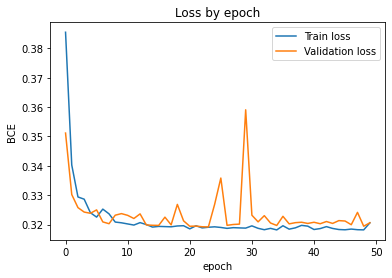

In [13]:
# Grafico Epoch|Loss
import matplotlib.pyplot as plt

fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")

Text(0, 0.5, 'Accuracy')

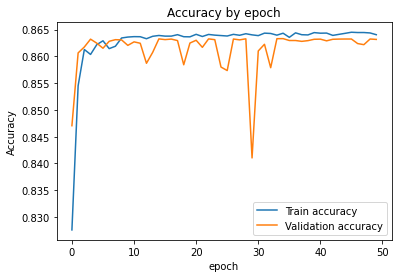

In [14]:
# Grafico Epoch|Accuracy
fig, ax1= plt.subplots(1,1)
ax1.plot(train_accuracy_by_epoch, label="Train accuracy")
ax1.plot(valid_accuracy_by_epoch, label="Validation accuracy")
ax1.legend()
ax1.set_title("Accuracy by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("Accuracy")

COMENTARIOS: 

Se probaron variaciones de la arquitectura y los hiperparametros presentados pero en ninguno de los experimentos se encontraron mejoras a los resultados mostrados en este notebook. El modelo alcanza una precisión en torno al 86% con una BCE de 0,321. Una precisión como la alcanzada se puede considerar bastante buena. El modelo consigue estos valores en pocas epocas (<10) y oscila en estos valores a partir de ese momento. Valores muy parecidos en la precisión entre el entranamiento y la validación (salvo algunas excepciones en epocas alrededor de 30) muestran que el modelo aprende a generalizar bastante bien y no evidencia signos de overfitting/underfitting.

# PARTE 2:
Inclusión de embeddings

In [15]:
# se crea la divisiónd de datos en features y variable a predecir
x1 = ds.drop(['Purchase_label'], axis = 1)
y1 = ds['Purchase_label']

x = x1.to_numpy()
y = y1.to_numpy()

# normalización Mix/Max
x_norm = (x - np.min(x, axis=0)) / (np.max(x, axis=0 ) - np.min(x, axis=0))

# creación de indices para división del dataset (85% training).
idx = np.random.permutation(x_norm.shape[0])
train_idx = idx[0:int(0.85*len(idx))]
valid_idx = idx[int(0.85*len(idx)):]

# Preparación de indices para user_id y product id

# Transformo user id a indices (idx) consecutivos para utilizar embeddings
user_id_to_idx = {value:i for i,value in enumerate(user_id.unique())}

# Vector de user_idx en el dataset
user_idx = np.array([user_id_to_idx[value] for value in user_id])

# Divido el vector user_idx en entrenamiento y validación
user_idx_train = user_idx[train_idx]
user_idx_valid = user_idx[valid_idx]
     
# Transformo product id a indices (idx) consecutivos para utilizar embeddings
product_id_to_idx = {value:i for i,value in enumerate(product_id.unique())}

# Vector de product_idx en el dataset
product_idx = np.array([product_id_to_idx[value] for value in product_id])

# Divido el vector product_idx en entrenamiento y validación
product_idx_train = product_idx[train_idx]
product_idx_valid = product_idx[valid_idx]
     
# División del set de datos
train_x = x_norm[train_idx]
train_y = y[train_idx]
valid_x = x_norm[valid_idx]
valid_y = y[valid_idx]

n_train = train_x.shape[0]
n_valid = valid_x.shape[0]


In [16]:
class MyDatasetEmbeddings(Dataset):

  def __init__(self, x, user_idx, product_idx, y):
    self.x = x
    self.user_idx = user_idx
    self.product_idx = product_idx
    self.y = y

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx], self.user_idx[idx], self.product_idx[idx], self.y[idx]
  
# Creo el dataset de entrenamiento
train_ds_embeddings = MyDatasetEmbeddings(train_x, user_idx_train, product_idx_train, train_y)

# Creo el dataset de validación
valid_ds_embeddings = MyDatasetEmbeddings(valid_x, user_idx_valid, product_idx_valid, valid_y)

# Creo los dataloader
train_dataloader_emb = DataLoader(train_ds_embeddings, batch_size = 64, shuffle= True)
valid_dataloader_emb = DataLoader(valid_ds_embeddings, batch_size = 64)

# Creo la arquitectura de la red
class NNetEmbeddings(torch.nn.Module):

  def __init__(self):
    super().__init__()

    self.embeddings_1 = torch.nn.Embedding(num_embeddings=5891, embedding_dim=12) 
    self.embeddings_2 = torch.nn.Embedding(num_embeddings=3631, embedding_dim=12)
    self.linear_1 = torch.nn.Linear(in_features=16+12+12, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features = 100, out_features=50, bias=True)
    self.relu_3 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 50, out_features= 1, bias=True)

  def forward(self, x, user_idx, product_idx):
    # Defino el cálculo del paso forward
    embeddings_outputs_user = self.embeddings_1(user_idx)
    embeddings_outputs_product = self.embeddings_2(product_idx)
    x = torch.cat([x, embeddings_outputs_user, embeddings_outputs_product], dim = 1)
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    x = self.relu_3(x)
    x = self.output(x)
    return x
  

# Selección de procesador
device = "cpu"

if torch.cuda.is_available():
    device = "cuda:0"

print(device)

# Instancio la red
nnet_emb = NNetEmbeddings()
nnet_emb  = nnet_emb.to(device)

# Loss y optimizador 
loss_function = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.Adam(nnet_emb.parameters(), lr=0.01, weight_decay=0.01) # con regularización L1

cpu


### Entrenamiento

In [17]:
# cantidad de epochs
epochs = 50

train_loss_by_epoch=[]
valid_loss_by_epoch=[]
train_accuracy_by_epoch=[]
valid_accuracy_by_epoch=[]


# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):

  # Entrenamiento
  nnet_emb.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []
  
  for i,data in enumerate(train_dataloader_emb):
    # Obtengo los datos del batch de entrenamiento
    x_batch, user_idx_batch, product_idx_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    user_idx_batch = user_idx_batch.to(device).int()
    product_idx_batch = product_idx_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)
    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    nnet_output = nnet_emb(x_batch, user_idx_batch, product_idx_batch)
    y_batch_hat = torch.sigmoid(nnet_output)
    # Calculo el loss
    loss = loss_function(nnet_output, y_batch)
    # Backpropagation
    loss.backward()
    # Actualizar los parámetros
    optimizer.step()
    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Almaceno la loss de la epoch para graficar
  train_loss_by_epoch.append(epoch_loss)
  # Cálculo la métrica de la epoch
  accuracy = metrics.accuracy_score(epoch_y, [j>=0.5 for j in epoch_y_hat])
  # Almaceno la accuracy de la epoch para graficar
  train_accuracy_by_epoch.append(accuracy)

  # Validación
  
  # Desactivo el cálculo de gradiente para validación
  nnet_emb.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader_emb):
      
      # Obtengo los datos del batch de validación
      x_batch, user_idx_batch, product_idx_batch, y_batch = data
      # Copio el batch al dispositivo donde entreno la red neuronal
      x_batch = x_batch.to(device).float()
      user_idx_batch = user_idx_batch.to(device).int()
      product_idx_batch = product_idx_batch.to(device).int()
      y_batch = y_batch.to(device).float().reshape(-1, 1)

      # Paso forward
      nnet_output = nnet_emb(x_batch, user_idx_batch, product_idx_batch)
      y_batch_hat = torch.sigmoid(nnet_output)

      # Calculo el loss
      loss = loss_function(nnet_output, y_batch)

      # En validación no hago backpropagation!!

      # Almaceno los valores reales y mis predicciones para cálcular las métricas
      valid_epoch_y += list(y_batch.detach().cpu().numpy())
      valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
      # Acumulo la loss del batch
      valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Almaceno la loss de la epoch para graficar
  valid_loss_by_epoch.append(valid_epoch_loss)
  # Cálculo la métrica de la epoch
  valid_accuracy = metrics.accuracy_score(valid_epoch_y, [j>=0.5 for j in valid_epoch_y_hat])
  # Almaceno la accuracy de la epoch para graficar
  valid_accuracy_by_epoch.append(valid_accuracy)


  # Impresión de resultados por epoch
 
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.316 / 0.292 | Train/Valid accuracy: 0.860 / 0.873
 Epoch 1 | Train/Valid loss: 0.293 / 0.289 | Train/Valid accuracy: 0.869 / 0.872
 Epoch 2 | Train/Valid loss: 0.292 / 0.292 | Train/Valid accuracy: 0.869 / 0.869
 Epoch 3 | Train/Valid loss: 0.291 / 0.287 | Train/Valid accuracy: 0.869 / 0.871
 Epoch 4 | Train/Valid loss: 0.290 / 0.289 | Train/Valid accuracy: 0.870 / 0.872
 Epoch 5 | Train/Valid loss: 0.291 / 0.286 | Train/Valid accuracy: 0.869 / 0.872
 Epoch 6 | Train/Valid loss: 0.291 / 0.283 | Train/Valid accuracy: 0.869 / 0.872
 Epoch 7 | Train/Valid loss: 0.291 / 0.289 | Train/Valid accuracy: 0.870 / 0.870
 Epoch 8 | Train/Valid loss: 0.290 / 0.291 | Train/Valid accuracy: 0.870 / 0.870
 Epoch 9 | Train/Valid loss: 0.292 / 0.284 | Train/Valid accuracy: 0.869 / 0.871
 Epoch 10 | Train/Valid loss: 0.291 / 0.284 | Train/Valid accuracy: 0.869 / 0.873
 Epoch 11 | Train/Valid loss: 0.291 / 0.288 | Train/Valid accuracy: 0.869 / 0.870
 Epoch 12 | Train/Valid lo

Text(0, 0.5, 'BCE')

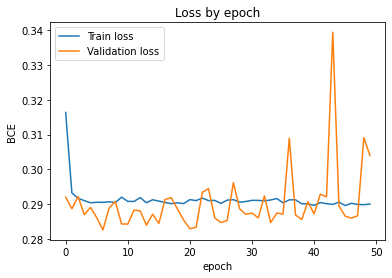

In [18]:
# Grafico Epoch|Loss
import matplotlib.pyplot as plt

fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.legend()
ax1.set_title("Loss by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("BCE")

Text(0, 0.5, 'Accuracy')

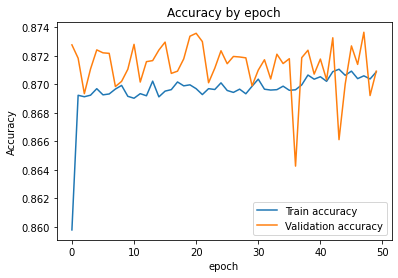

In [19]:
# Grafico Epoch|Accuracy
fig, ax1= plt.subplots(1,1)
ax1.plot(train_accuracy_by_epoch, label="Train accuracy")
ax1.plot(valid_accuracy_by_epoch, label="Validation accuracy")
ax1.legend()
ax1.set_title("Accuracy by epoch")
ax1.set_xlabel("epoch")
ax1.set_ylabel("Accuracy")

COMENTARIOS:

En este modelo tambien se han probado distintas arquitecturas y variaciones en los hiperparámetros sin conseguir mejoras significativas respecto a lo presentado en este notebook.
Con la inclusión de los embeddings user_id y product_id el modelo mejora levemente la presición llevandolo a valores en torno al 87% con una BCE de 0,3. El modelo consigue estos valores en pocas epocas (<10) y oscila en estos valores a partir de ese momento. Si bien el modelo generaliza bien y alcanza buenos resultados, el comportamiento analizado con los gráficos expuestos anteriormente no es el que esperaba o el que normalmente se ve tras entrenar un modelo. Por ejemplo, la precisión de validación es mayor que la de entrenamiento en practicamente todas las épocas, esto no es usual y, si bien puede ocurrir por variaciones aleatorias en los datos, tras investigar decidí probar sacando la regularización L1. Sacar la regularización L1 generó un modelo con resultados más parecidos a los esperados aunque con algo de overfitting (precisión en entrenamiento en torno al 90% y 85% en validación, y BCE en entrenamiento de 0,22 y en validación 0,44). Finalmente ese plus que otorga la regularización al evitar el overfitting genera un mejor modelo en este caso.
